<img src="./img/Logo.jpg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo Semanal 8 - Filtros Digitales

### Juan Manuel Ronchetti

## Inicializacion de bibliotecas

In [2]:
import sympy as sp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from pytc2.sistemas_lineales import  analyze_sys
import warnings
warnings.filterwarnings('ignore')

# Ejercicio 2 TP5

Se desea emular digitalmente la característica de un filtro analógico pasa bajos Butterworth de orden 2, con $f_c = 1kHz$.

* A.
Para $f_s = 100kHz$ y aplicando transformación bilineal, obtener un filtro con respuesta $H(Z)$ cuyo comportamiento emule al Butterworth analógico. Trazar la respuesta en frecuencia de módulo y fase de ambos filtros sobre un mismo gráfico para establecer comparaciones.
* B. Repetir el punto anterior para $f_s = 10kHz$
* C. Repetir los puntos A) y B) si se desea emular digitalmente la característica de un filtro analógico pasa altos Butterworth de orden 2, con $f_c = 6kHz$
* D. Indique en cuál de los 3 casos ( A, B ó C ) justificaría rediseñar aplicando prewarping. Explique el motivo en pocas palabras.

## A) y B)

<img src="./img/Ej1.png" width="650" /> 

Filtro Analogico


1/(s**2 + 1.4142135623731*s + 1)

Filtro Digital


(1.0*z**2 + 2.0*z + 1.0)/(1.0*k**2 - 1.4142135623731*k + z**2*(1.0*k**2 + 1.4142135623731*k + 1.0) + z*(2.0 - 2.0*k**2) + 1.0)

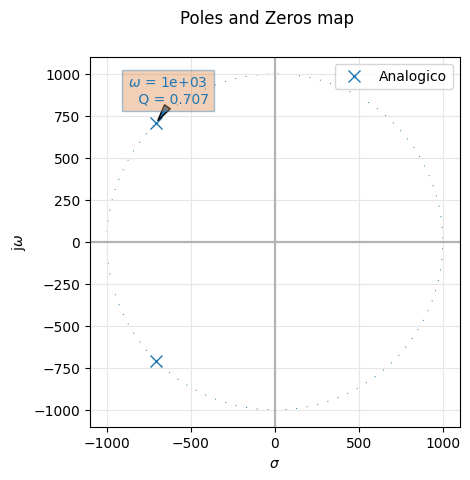

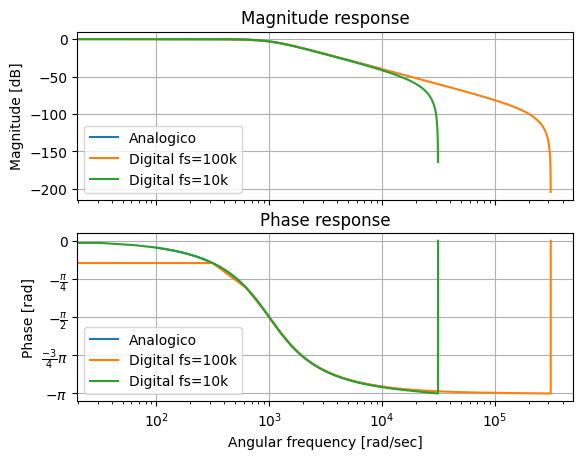

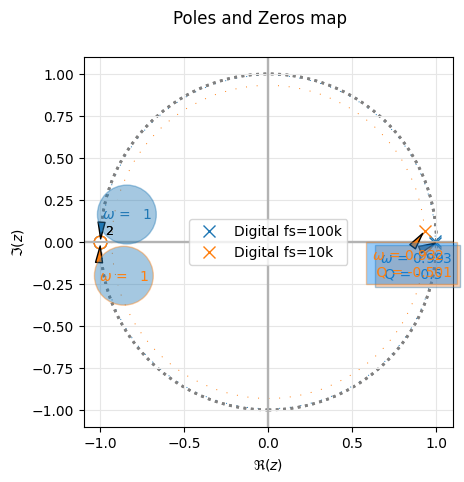

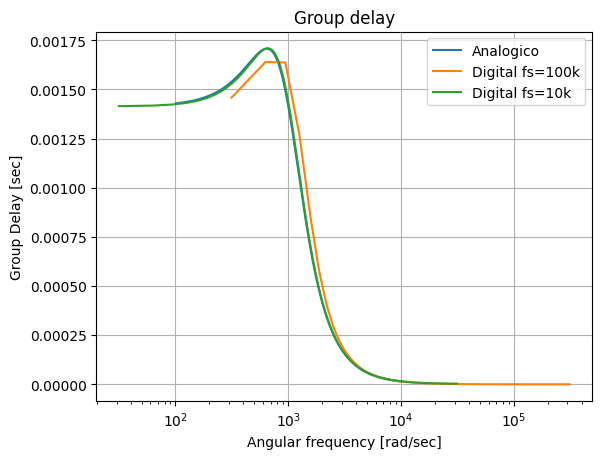

In [89]:
#------------------------------- Resolución simbólica -------------------------------

s, z = sp.symbols('s z', complex=True)
k, fs = sp.symbols('k fs', real=True, positive=True)

Ts = 1/(s**2+s*np.sqrt(2)+1)
fz = k * (z-1)/(z+1)

Tz = sp.collect(sp.simplify(sp.expand(Ts.subs(s, fz))), z)

print("Filtro Analogico")
display(Ts)
print("Filtro Digital")
display(Tz)

#------------------------------- Resolución numerica -------------------------------

fc = 1000
fs = 100000
fs2 = 10000

# FILTRO ANALOGICO
num_a = [0,0,fc**2]
den_a = [1, fc/0.707, fc**2]

# FILTRO DIGITAL fs=100K Hz
k_  = 2*fs/fc # Normalizado a la fc
num_d = [1, 2, 1]
den_d = [(1 + np.sqrt(2)*k_ + k_**2), (2-2*k_**2), (1 - np.sqrt(2)*k_ + k_**2)]
wrad, hh = sig.freqz(num_d, den_d, worN=1000)

# FILTRO DIGITAL fs=10K Hz
k2_ = 2*fs2/fc
num_d2 = [1, 2, 1]
den_d2 = [(1 + np.sqrt(2)*k2_ + k2_**2), (2-2*k2_**2), (1 - np.sqrt(2)*k2_ + k2_**2)]
wrad2, hh2 = sig.freqz(num_d2, den_d2, worN=1000)

#------------------------------- Graficos -------------------------------

tf_a = sig.TransferFunction(num_a, den_a)
tf_d = sig.TransferFunction(num_d, den_d, dt=1/fs)
tf_d2 = sig.TransferFunction(num_d2, den_d2, dt=1/fs2)

analyze_sys(tf_a, "Analogico")
analyze_sys(tf_d, "Digital fs=100k")
analyze_sys(tf_d2, "Digital fs=10k")

## C)

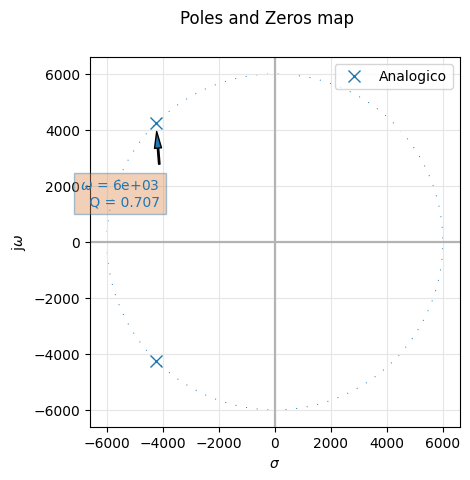

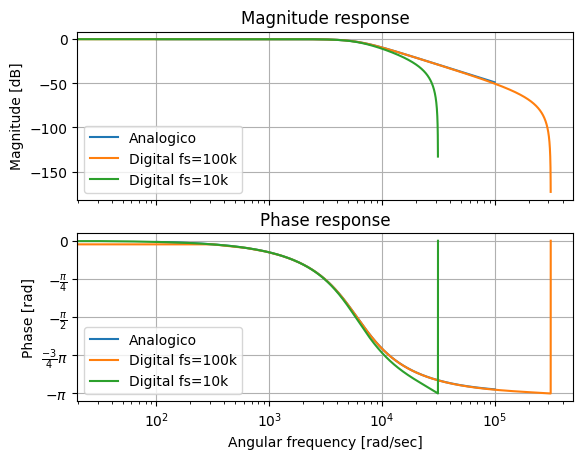

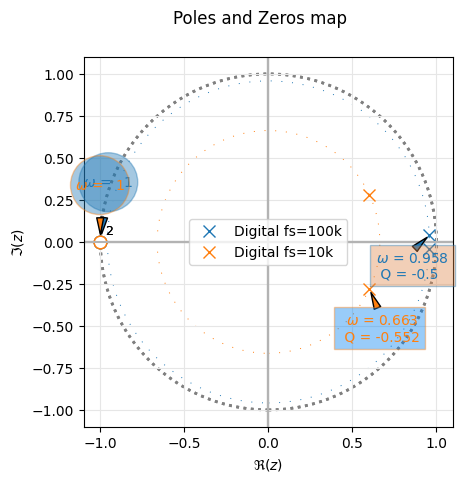

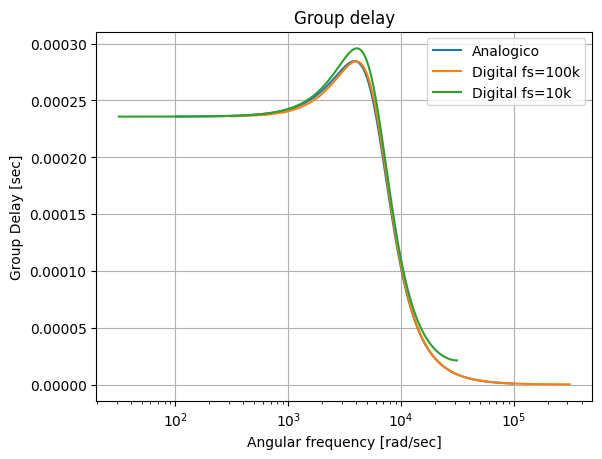

In [90]:
#------------------------------- Resolución numerica -------------------------------

fc6 = 6000
fs = 100000
fs2 = 10000

# FILTRO ANALOGICO
num_a6 = [0,0,fc6**2]
den_a6 = [1, fc6/0.707, fc6**2]

# FILTRO DIGITAL fs=100K Hz
k_  = 2*fs/fc6 # Normalizado a la fc
num_d6 = [1, 2, 1]
den_d6 = [(1 + np.sqrt(2)*k_ + k_**2), (2-2*k_**2), (1 - np.sqrt(2)*k_ + k_**2)]
wrad6, hh6 = sig.freqz(num_d6, den_d6, worN=1000)

# FILTRO DIGITAL fs=10K Hz
k26_ = 2*fs2/fc6
num_d62 = [1, 2, 1]
den_d62 = [(1 + np.sqrt(2)*k26_ + k26_**2), (2-2*k26_**2), (1 - np.sqrt(2)*k26_ + k26_**2)]
wrad62, hh62 = sig.freqz(num_d62, den_d62, worN=1000)

#------------------------------- Graficos -------------------------------

tf_a6 = sig.TransferFunction(num_a6, den_a6)
tf_d6 = sig.TransferFunction(num_d6, den_d6, dt=1/fs)
tf_d26 = sig.TransferFunction(num_d62, den_d62, dt=1/fs2)

analyze_sys(tf_a6, "Analogico")
analyze_sys(tf_d6, "Digital fs=100k")
analyze_sys(tf_d26, "Digital fs=10k")

## D)

El caso donde será mas conveniente utilizar prewarping es el inciso B). Esto es debido a que presenta el ancho de banda digital mas corto (fs/2 corresponde a 5kHz), y la frecuencia de 1kHz se encuentra en el rango donde los efectos del warping seran mas notorios. 

En el caso en el que se tiene fs=10kHz para la fc=6kHz directamente seria necesario emplear otra frecuencia de muestreo, ya que el minimo requerido para ese caso corresponderia a $2f_c$, en este caso 12kHz, por el Teorema de Nyquist. 

# Ejercicio 3 TP5

Dadas las siguientes respuestas al impulso se pide:
* Transferencia del sistema $H(z)$ 
* Singularidades en el plano 𝑧
* Respuesta de módulo y fase

## a)

#### Filtro de media movil
* $h_1(k)=(1,1)$
* $h_2(k)=(1,1, 1)$

(0.0, 1.0, -60.0, 10.0)

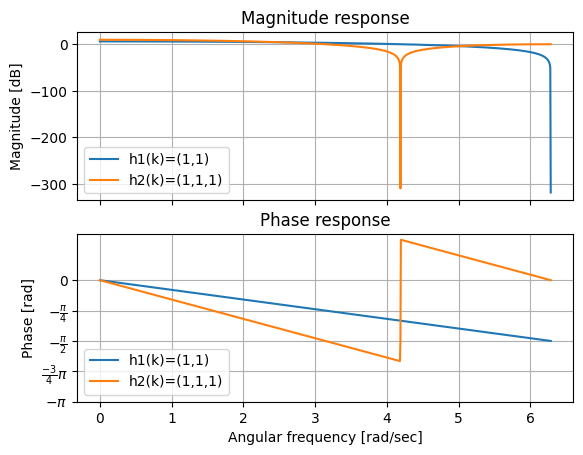

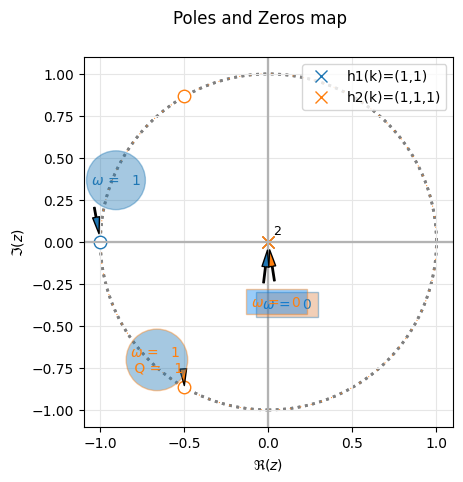

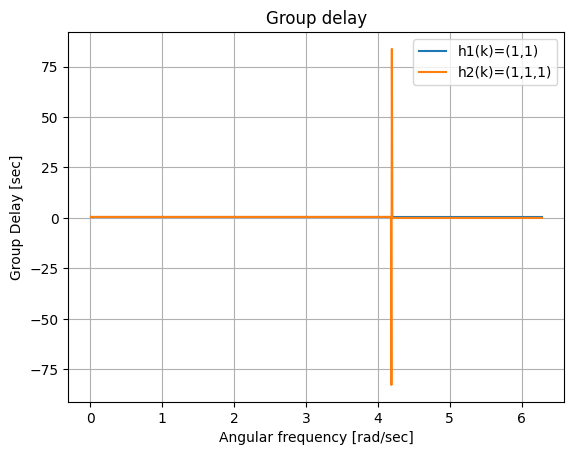

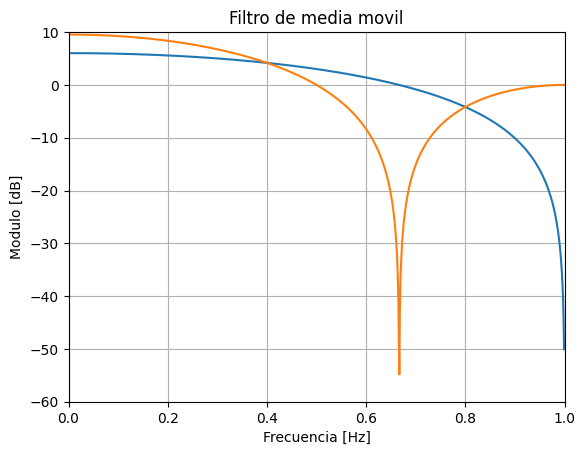

In [91]:
fs = 2
num_d = np.array([1, 1])
den_d = np.array([1,0])
wrad, hh = sig.freqz(num_d, den_d, worN=1000)
ww = wrad/np.pi * (fs/2)

num_d2 = np.array([1, 1, 1])
den_d2 = np.array([1,0,0])
wrad2, hh2 = sig.freqz(num_d2, den_d2, worN=1000)
ww2 = wrad2/np.pi * (fs/2)

#------------------------------- Graficos -------------------------------

tf_d = sig.TransferFunction(num_d, den_d, dt=1/fs)
analyze_sys(tf_d, "h1(k)=(1,1)")
tf_d2 = sig.TransferFunction(num_d2, den_d2, dt=1/fs)
analyze_sys(tf_d2, "h2(k)=(1,1,1)")


plt.figure()
plt.plot(ww, 20 * np.log10(abs(hh)), label="h1(k)=(1,1)" )
plt.plot(ww2, 20 * np.log10(abs(hh2)), label="h2(k)=(1,1, 1)" )
plt.title("Filtro de media movil")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Modulo [dB]')
plt.grid()
plt.axis([0,1,-60, 10])

#### 1. ¿Qué modificación debería implementarse para que la salida representa la media aritmética?

Se deberian reemplazar los coeficientes de los filtros por la inversa de la cantidad total de coeficientes. Los filtros resultantes serian:
* $h_1(k) = (0.5 , 0,5)$
* $h_2(k) = (0.33 , 0.33, 0.33)$

#### 2. Para el último sistema, ¿qué frecuencia de muestreo se debería adoptar si se quisiera eliminar con dicho filtro la interferencia causada por la frecuencia de línea de 50 Hz?

Se deberia adoptar una fs = 150Hz. A continuacion se observa el filtro resultante:

(0.0, 75.0, -60.0, 10.0)

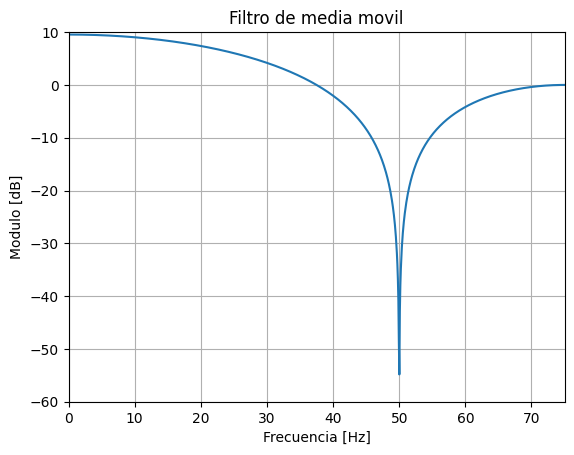

In [92]:
fs = 150
num_d3 = np.array([1, 1, 1])
den_d3 = np.array([1,0,0])
wrad3, hh3 = sig.freqz(num_d3, den_d3, worN=1000)
ww3 = wrad3/np.pi * (fs/2)

#------------------------------- Graficos -------------------------------
plt.figure()
plt.plot(ww3, 20 * np.log10(abs(hh3)), label="h2(k)=(1,1, 1)" )
plt.title("Filtro de media movil")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Modulo [dB]')
plt.grid()
plt.axis([0,75,-60, 10])

## b)

#### Filtro diferenciador
* $h_1(k)=(1,-1)$
* $h_2(k)=(1,0, -1)$

(0.0, 1.0, -60.0, 10.0)

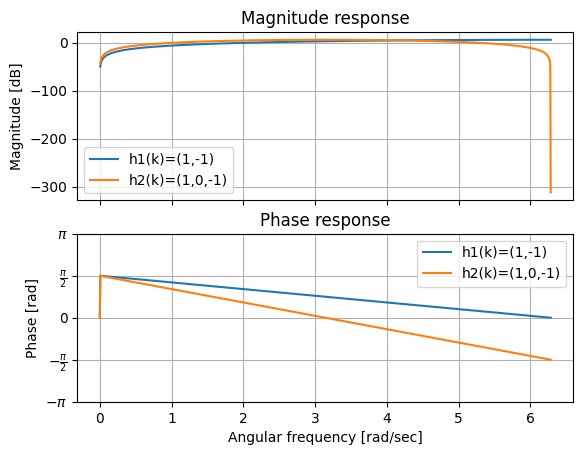

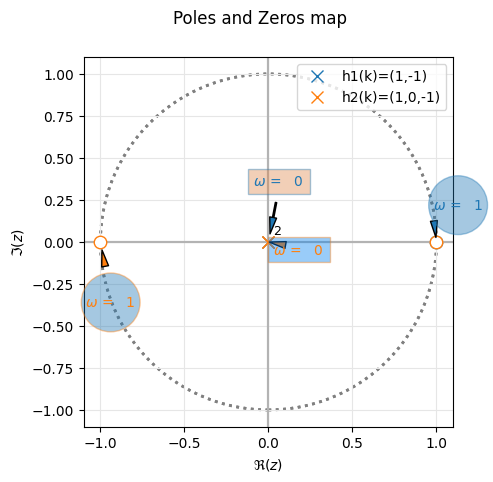

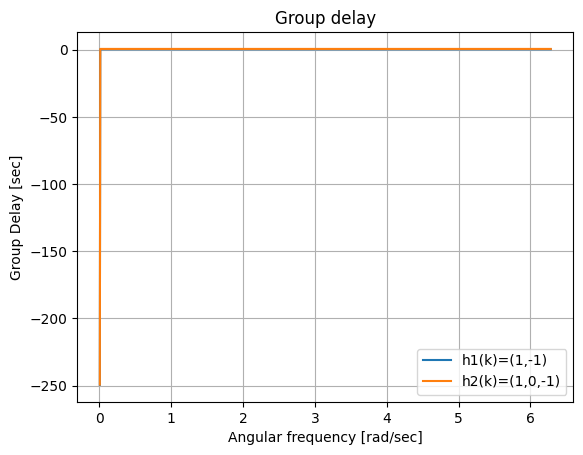

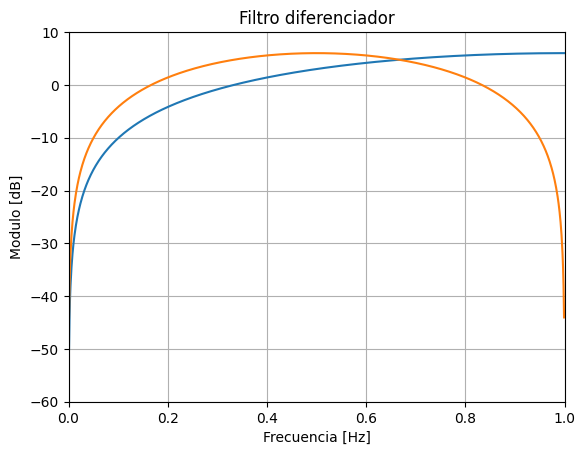

In [93]:
fs = 2
num_d = np.array([1, -1])
den_d = np.array([1,0])
wrad, hh = sig.freqz(num_d, den_d, worN=1000)
ww = wrad/np.pi * (fs/2)

num_d2 = np.array([1, 0, -1])
den_d2 = np.array([1,0,0])
wrad2, hh2 = sig.freqz(num_d2, den_d2, worN=1000)
ww2 = wrad2/np.pi * (fs/2)

#------------------------------- Graficos -------------------------------

tf_d = sig.TransferFunction(num_d, den_d, dt=1/fs)
analyze_sys(tf_d, "h1(k)=(1,-1)")
tf_d2 = sig.TransferFunction(num_d2, den_d2, dt=1/fs)
analyze_sys(tf_d2, "h2(k)=(1,0,-1)")


plt.figure()
plt.plot(ww, 20 * np.log10(abs(hh)), label="h1(k)=(1,-1)" )
plt.plot(ww2, 20 * np.log10(abs(hh2)), label="h2(k)=(1,0, -1)" )
plt.title("Filtro diferenciador")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Modulo [dB]')
plt.grid()
plt.axis([0,1,-60, 10])

#### 1. ¿Qué demora introducen ambos sistemas?

El primer sistema introduce una demora de 1 ciclo para producir la primera respuesta, mientras que el segundo introduce una demora de 2 ciclos. Solamente agregando demora, sin mayor costo computacional, se logra cambiar mucho la respuesta obtenida, como se oberva en las anteriores simulaciones.

#### 2. Hasta qué frecuencias estos sistemas se comportan como un derivador ideal. Considere una tolerancia admisible del 5% respecto a su respuesta ideal |𝐻(Ω)| = Ω.

(0.0, 0.2, -0.1, 1.0)

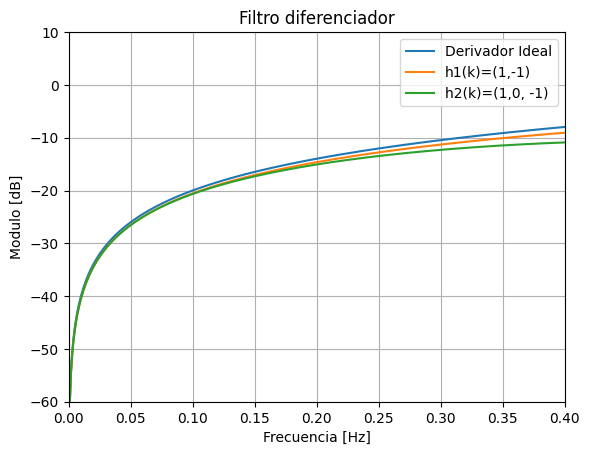

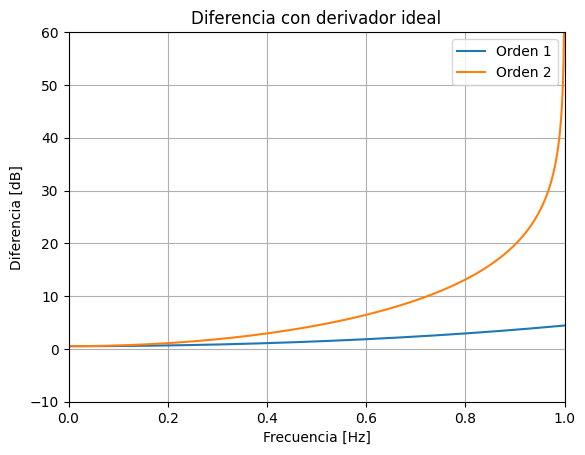

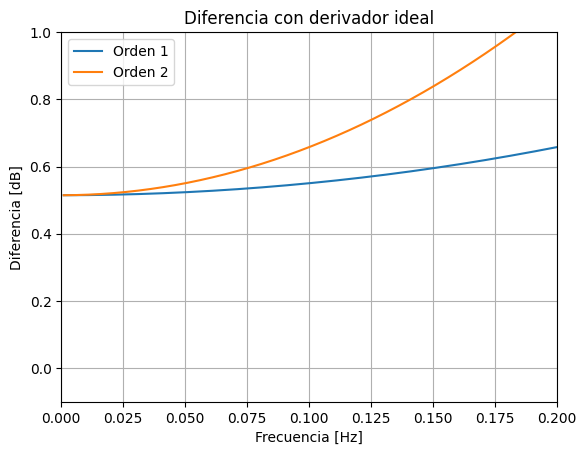

In [67]:
fs = 2

num_d = 0.3 * np.array([1, -1])
den_d = np.array([1,0])
wrad, hh = sig.freqz(num_d, den_d, worN=1000)
ww = wrad/np.pi * (fs/2)

num_d2 = 0.15 * np.array([1, 0, -1])
den_d2 = np.array([1,0,0])
wrad2, hh2 = sig.freqz(num_d2, den_d2, worN=1000)
ww2 = wrad2/np.pi * (fs/2)

hhi = ww

#------------------------------- Graficos -------------------------------
plt.figure(1)
plt.plot(ww, 20* np.log10(abs(hhi)), label="Derivador Ideal" )
plt.plot(ww, 20* np.log10(abs(hh)), label="h1(k)=(1,-1)" )
plt.plot(ww2, 20* np.log10(abs(hh2)), label="h2(k)=(1,0, -1)" )
plt.legend()
plt.title("Filtro diferenciador")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Modulo [dB]')
plt.grid()
plt.axis([0,0.4,-60, 10])

plt.figure(2)
plt.plot(ww, 20* np.log10(abs(hhi)) - 20* np.log10(abs(hh)) , label="Orden 1" )
plt.plot(ww2, 20* np.log10(abs(hhi)) - 20* np.log10(abs(hh2)), label="Orden 2" )
plt.legend()
plt.title("Diferencia con derivador ideal")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Diferencia [dB]')
plt.grid()
plt.axis([0,1,-10, 60])

plt.figure(3)
plt.plot(ww, 20* np.log10(abs(hhi)) - 20* np.log10(abs(hh)) , label="Orden 1" )
plt.plot(ww2, 20* np.log10(abs(hhi)) - 20* np.log10(abs(hh2)), label="Orden 2" )
plt.legend()
plt.title("Diferencia con derivador ideal")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Diferencia [dB]')
plt.grid()
plt.axis([0,0.2,-0.1, 1])

# Ejercicio 2

Dado el siguiente filtro digital:

<img src="./img/Ej2.png" width="250" /> 

Se pide:
* a) Para la transferencia del filtro con M = 2 y α=0.8, calcular: el diagrama de polos y ceros, la respuesta en frecuencia de módulo y fase, retardo de grupo.
* b) Si quisiéramos anular una senoidal interferente de 125 Hz y su tercera armónica, y sólo dispone de un sumador y el filtro de la figura con M = 4. Proponga un esquema de la solución y calcule los parámetros del filtro que sería necesario adecuar.

## a)

### Obtencion de la transferencia

<img src="./img/Ej2_a.png" width="650" /> 

### Simulacion

(0.0, 1.0, -10.0, 10.0)

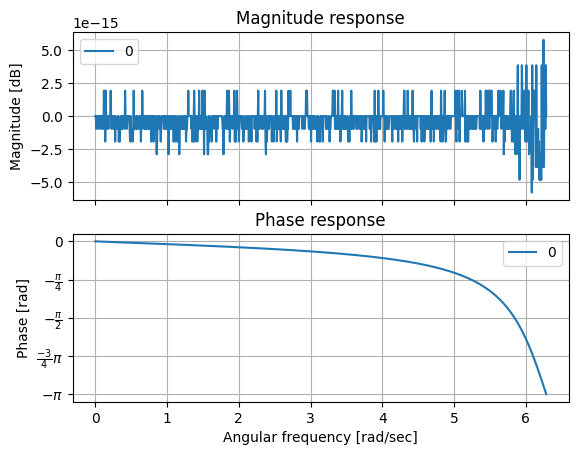

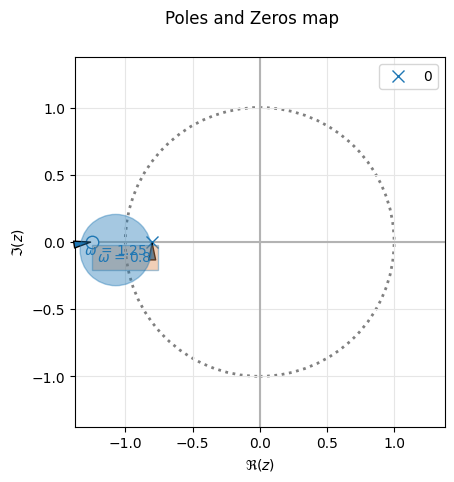

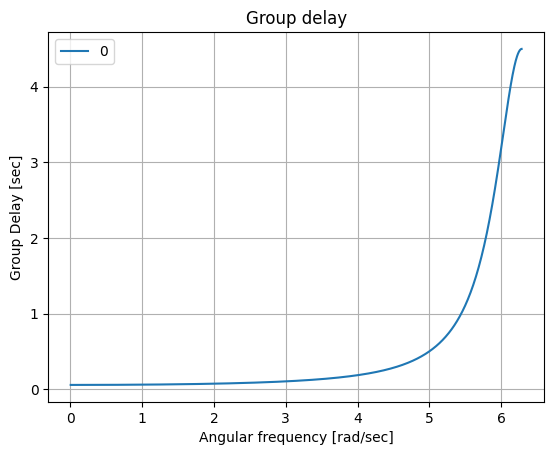

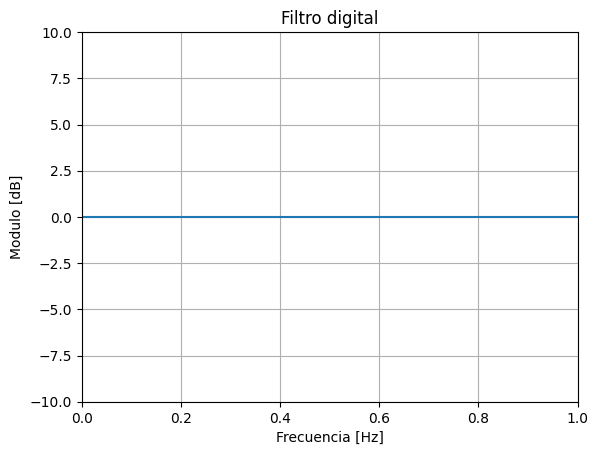

In [94]:
fs = 2

num_d = np.array([0.8, 1])
den_d = np.array([1, 0.8])

wrad, hh = sig.freqz(num_d, den_d, worN=1000)
ww = wrad/np.pi * (fs/2)

#------------------------------- Graficos -------------------------------
tf_d = sig.TransferFunction(num_d, den_d, dt=1/fs)

analyze_sys(tf_d)

plt.figure()
plt.plot(ww, 20 * np.log10(abs(hh)), label="Filtro" )
plt.title("Filtro digital")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Modulo [dB]')
plt.grid()
plt.axis([0,1,-10, 10])

## b)

### Diseño

<img src="./img/Ej2_b.png" width="550" /> 

Para el diseño se emplea una $f_s = 1000$ con un $\alpha = 0.9$. El filtro resultante se muestra a continuacion:

(0.0, 500.0, -50.0, 15.0)

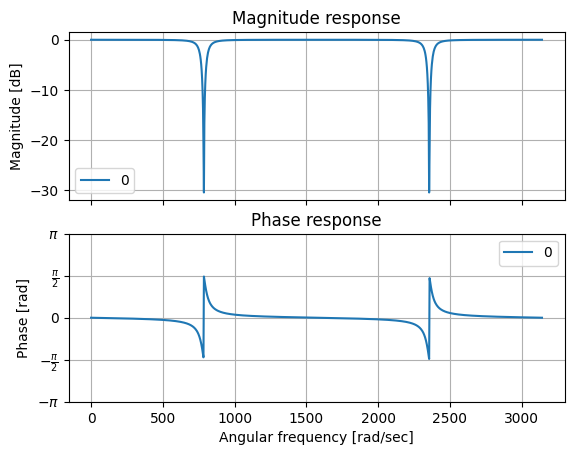

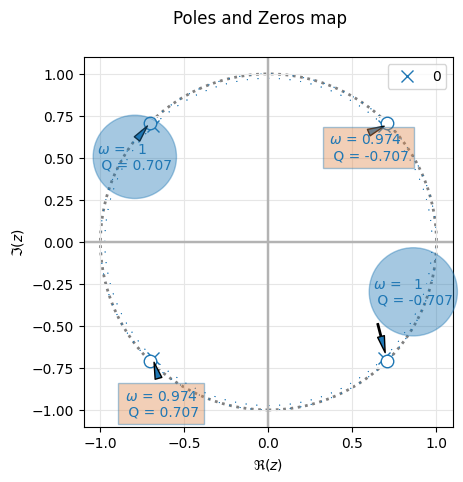

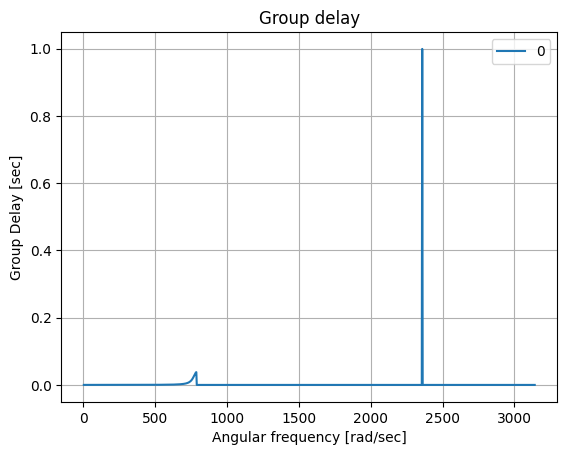

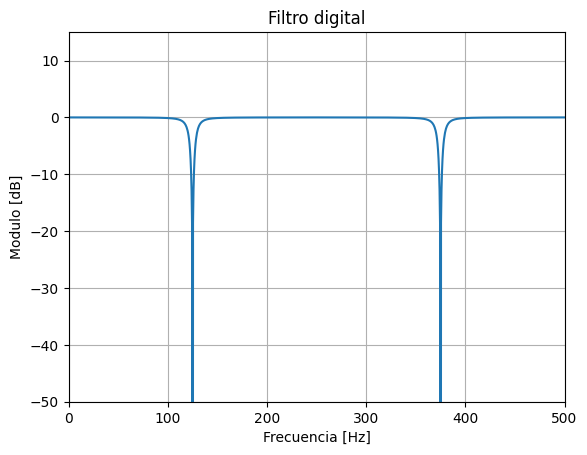

In [95]:
fs = 1000
a  = 0.9

# Se multiplica la entrada por 0.5 para tener ganancia nula en banda de paso
num_d = 0.5 * np.array([1+a,0,0,0,  1+a])
den_d = np.array([1,0,0,0, a])

wrad, hh = sig.freqz(num_d, den_d, worN=1000)
ww = wrad/np.pi * (fs/2)

#------------------------------- Graficos -------------------------------
tf_d = sig.TransferFunction(num_d, den_d, dt=1/fs)

analyze_sys(tf_d)

plt.figure()
plt.plot(ww, 20 * np.log10(abs(hh)), label="Filtro" )
plt.title("Filtro digital")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Modulo [dB]')
plt.grid()
plt.axis([0,fs/2,-50, 15])

Se observa que el filtro anula correctamente la frecuencia de 125 Hz y su tercera armonica de 375 Hz.